## Classification Project

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
data_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
print(data_train['job'].unique())
print(data_train['marital'].unique())
print(data_train['education'].unique())
print(data_train['default'].unique())
print(data_train['housing'].unique())
print(data_train['loan'].unique())
print(data_train['contact'].unique())
print(data_train['month'].unique())
print(data_train['poutcome'].unique())

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['unknown' 'secondary' 'tertiary' 'primary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']


## Missing values

In [7]:
data_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

## Univarient Analysis

### Categorical Variable

In [8]:
data_train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

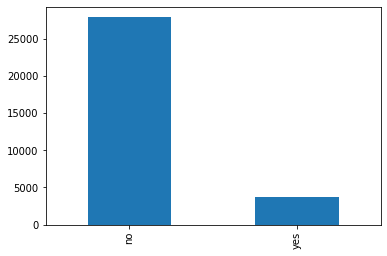

In [9]:
data_train['subscribed'].value_counts().plot(kind='bar')

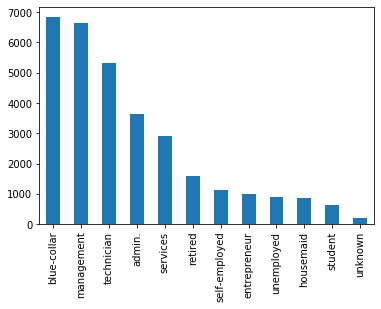

In [10]:
data_train['job'].value_counts().plot.bar()

In [11]:
data_train['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

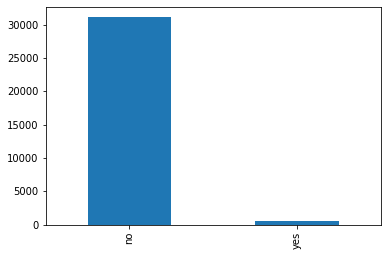

In [12]:
data_train['default'].value_counts().plot.bar()

### Continous Variables

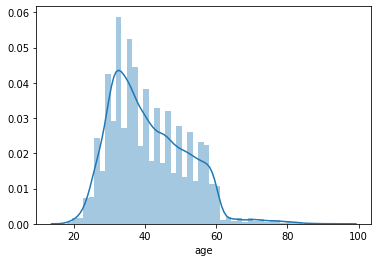

In [13]:
sns.distplot(data_train['age'])

## Bivarient Analysis

Text(0.5, 1.0, 'Job Vs Subscribed')

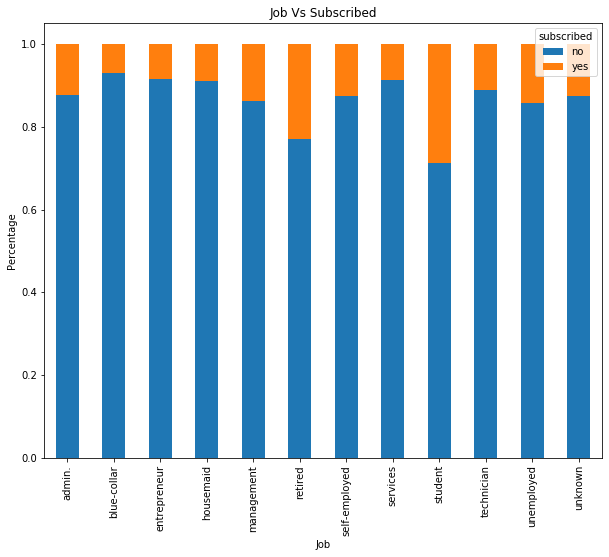

In [14]:
job_sub=pd.crosstab(data_train.job,data_train.subscribed)
job_sub.div(job_sub.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.title('Job Vs Subscribed')

Text(0.5, 1.0, 'Marital Vs Subscribed')

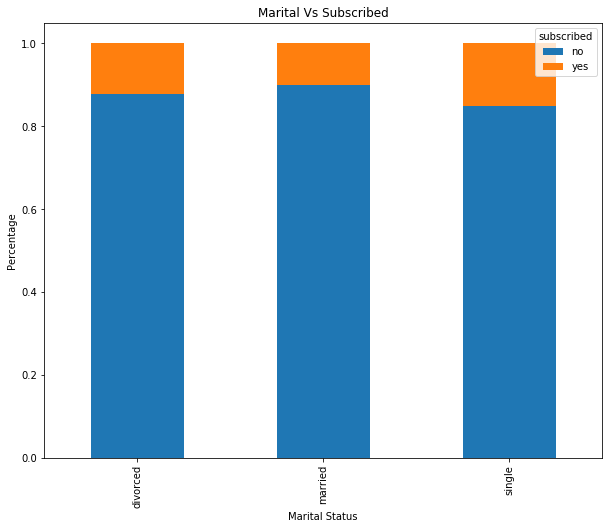

In [15]:
marr_sub=pd.crosstab(data_train.marital,data_train.subscribed)
marr_sub.div(marr_sub.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Marital Vs Subscribed')

Text(0.5, 1.0, 'Education Vs Subscribed')

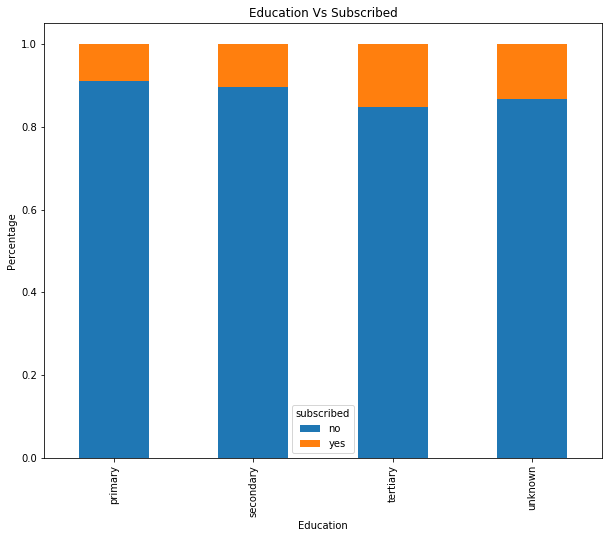

In [16]:
edu_sub=pd.crosstab(data_train.education,data_train.subscribed)
edu_sub.div(edu_sub.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Education Vs Subscribed')

Text(0.5, 1.0, 'Default Vs Subscribed')

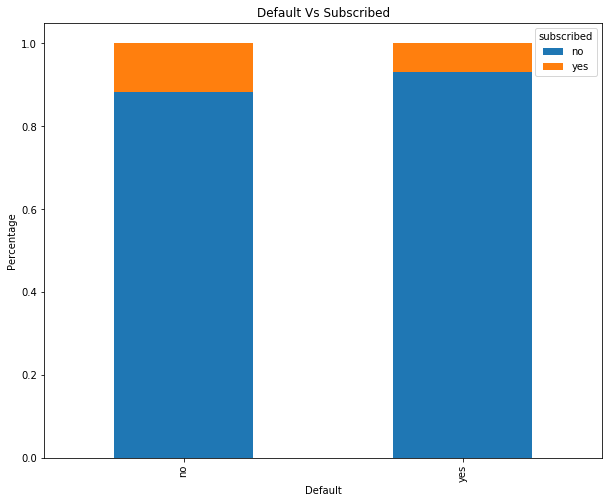

In [17]:
def_sub=pd.crosstab(data_train.default,data_train.subscribed)
def_sub.div(def_sub.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.title('Default Vs Subscribed')

In [18]:
data_train['subscribed'].replace('yes',1,inplace=True)
data_train['subscribed'].replace('no',0,inplace=True)

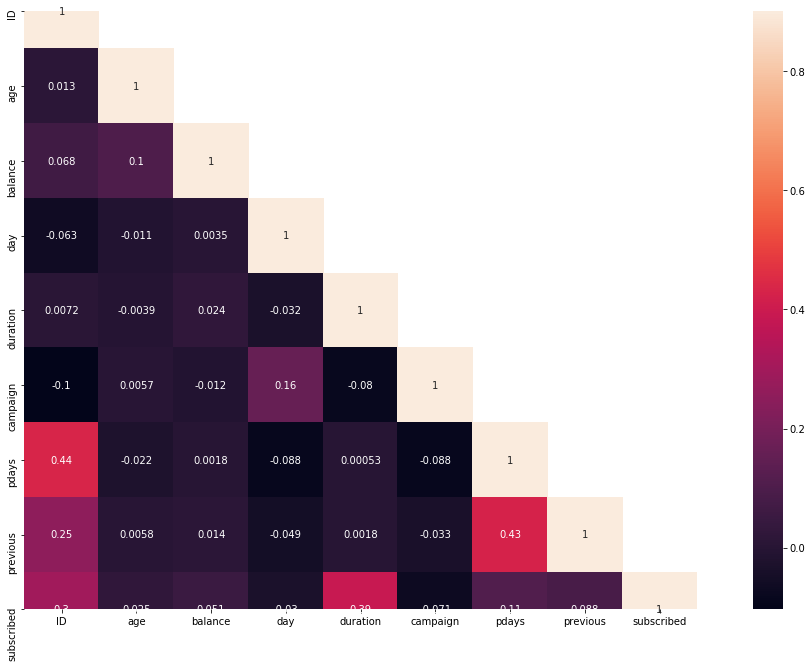

In [19]:
corr=data_train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,11)
sns.heatmap(corr,mask=mask,vmax=0.9,square=True,annot=True)

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [24]:
Y=data_train['subscribed']
X=data_train.drop('subscribed',1)

In [25]:
print(X.shape)
print(Y.shape)

(31647, 17)
(31647,)


In [28]:
X=pd.get_dummies(X)

#### Spliting Data

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=True)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25317, 52)
(6330, 52)
(25317,)
(6330,)


### Logictic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)

C:\Users\yadav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predict_test_Y=model_lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predict_test_Y)

0.8993680884676145

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [69]:
pred_test_Y=clf.predict(X_test)

In [70]:
accuracy_score(Y_test,pred_test_Y)

0.9088467614533965

## Predicting

In [71]:
data_test=pd.get_dummies(data_test)

In [72]:
test_data_Y=clf.predict(data_test)

In [73]:
submission=pd.DataFrame()

In [75]:
submission['Id']=data_test['ID']
submission['subscribed']=test_data_Y

In [81]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [83]:
submission.to_csv('submission_Y.csv',header=True,index=False)